<a href="https://colab.research.google.com/github/JMML2021/Tasca-M5-T02-Introducci-al-Machine-Learning/blob/main/Tasca_M5_T02_Machine_Leaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercici 1

Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

També adjunt trobaràs una descripció de les diferents variables del dataset.

https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Activo Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Abro el fichero una vez adecuado

#path='https://drive.google.com/file/d/1j8WdhTxMpngrUigfcfrJynng-9JHo9xa/view?usp=sharing'
path = ('/content/drive/MyDrive/01_COLAB/housing data.csv')
#data = pd.read_csv(file,
    
df=  pd.read_csv(path, sep=',', encoding="latin-1")
df.shape

nRow, nCol = df.shape
print(f'Hay  {nRow} filas con {nCol} columnas')
df1=df.copy()
df1.iloc[0]

Hay  505 filas con 14 columnas


0.00632      0.02731
18.00        0.00000
2.310        7.07000
0            0.00000
0.5380       0.46900
6.5750       6.42100
65.20       78.90000
4.0900       4.96710
1            2.00000
296.0      242.00000
15.30       17.80000
396.90     396.90000
4.98         9.14000
24.00       21.60000
Name: 0, dtype: float64

Veo que es un fichero sin nombre en las columnas. Utilizo el fichero de TXT e identifico los nombres de las columnas.

In [ ]:
nombre_Columnas = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df1.columns = [Nombre_Columnas]
df1.iloc[0]

CRIM         0.02731
ZN           0.00000
INDUS        7.07000
CHAS         0.00000
NOX          0.46900
RM           6.42100
AGE         78.90000
DIS          4.96710
RAD          2.00000
TAX        242.00000
PTRATIO     17.80000
B          396.90000
LSTAT        9.14000
MEDV        21.60000
Name: 0, dtype: float64

In [ ]:
# Analizo los datos
print(df1.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  505.000000  505.000000  505.000000  505.000000  505.000000  505.000000   
mean     3.620667   11.350495   11.154257    0.069307    0.554728    6.284059   
std      8.608572   23.343704    6.855868    0.254227    0.115990    0.703195   
min      0.009060    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082210    0.000000    5.190000    0.000000    0.449000    5.885000   
50%      0.259150    0.000000    9.690000    0.000000    0.538000    6.208000   
75%      3.678220   12.500000   18.100000    0.000000    0.624000    6.625000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  505.000000  505.000000  505.000000  505.000000  505.000000  505.000000   
mean    68.581584    3.794459    9.566337  408.459406   18.461782  356.594376   
std     28.176371    2.1077

In [ ]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   (CRIM,)     505 non-null    float64
 1   (ZN,)       505 non-null    float64
 2   (INDUS,)    505 non-null    float64
 3   (CHAS,)     505 non-null    int64  
 4   (NOX,)      505 non-null    float64
 5   (RM,)       505 non-null    float64
 6   (AGE,)      505 non-null    float64
 7   (DIS,)      505 non-null    float64
 8   (RAD,)      505 non-null    int64  
 9   (TAX,)      505 non-null    float64
 10  (PTRATIO,)  505 non-null    float64
 11  (B,)        505 non-null    float64
 12  (LSTAT,)    505 non-null    float64
 13  (MEDV,)     505 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


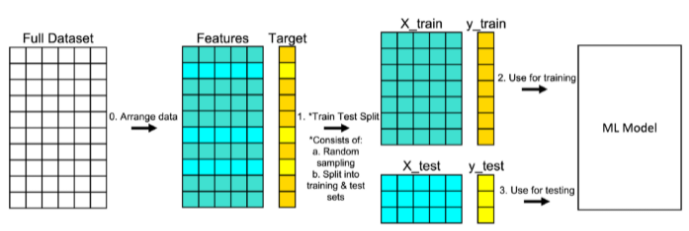

In [ ]:
columnas = list(df1.columns[:-1])
#columnas[0][0]
columnas

[('CRIM',),
 ('ZN',),
 ('INDUS',),
 ('CHAS',),
 ('NOX',),
 ('RM',),
 ('AGE',),
 ('DIS',),
 ('RAD',),
 ('TAX',),
 ('PTRATIO',),
 ('B',),
 ('LSTAT',)]

In [ ]:
features = ['CRIM','ZN','INDUS','CHAS','NOX']
features = columnas
x = df1.loc[:, features]
y = df1.loc[:, ['MEDV']]

In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

from sklearn.model_selection import train_test_split   
    
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2, 
                                                    random_state = 0) 
   
print("xtrain shape : ", xtrain.shape) 
print("xtest shape  : ", xtest.shape) 
print("ytrain shape : ", ytrain.shape) 
print("ytest shape  : ", ytest.shape) 

xtrain shape :  (404, 13)
xtest shape  :  (101, 13)
ytrain shape :  (404, 1)
ytest shape  :  (101, 1)


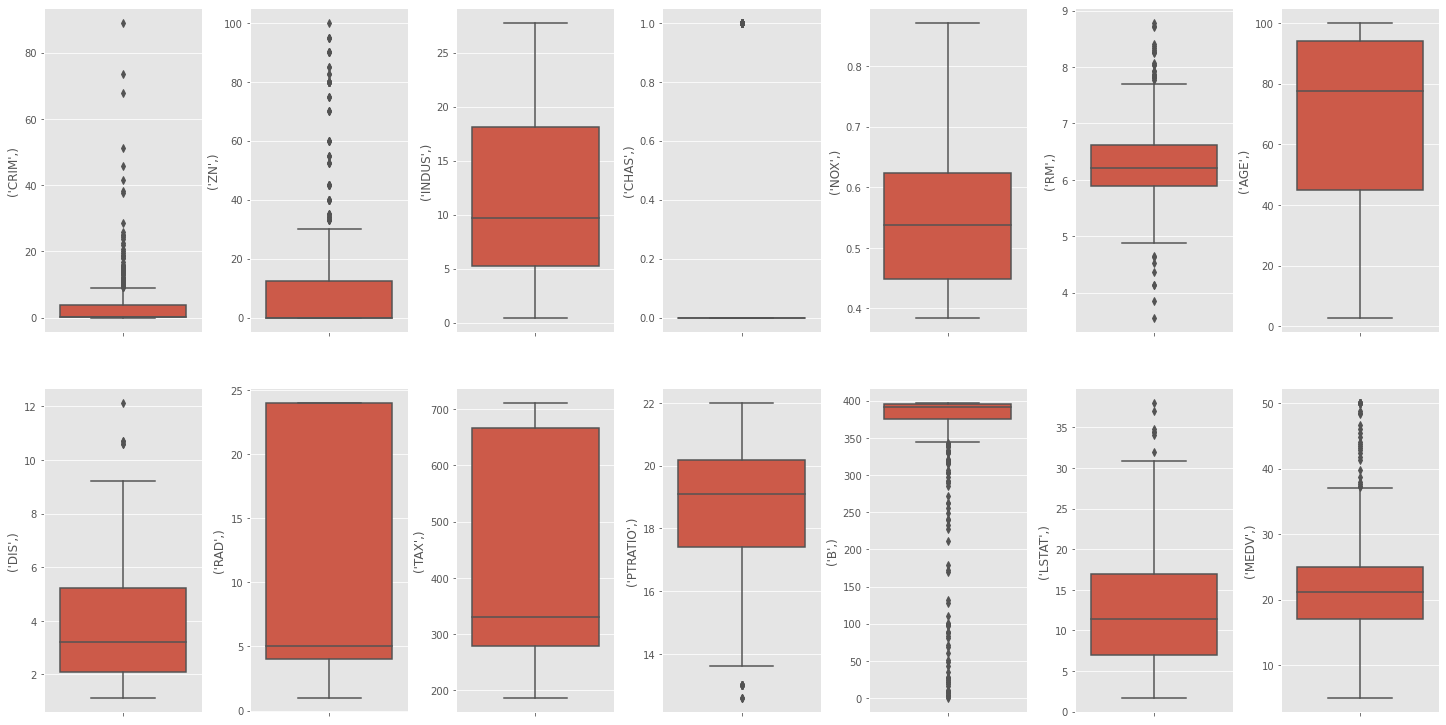

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df1.items():
    sns.boxplot(y=k, data=df1, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

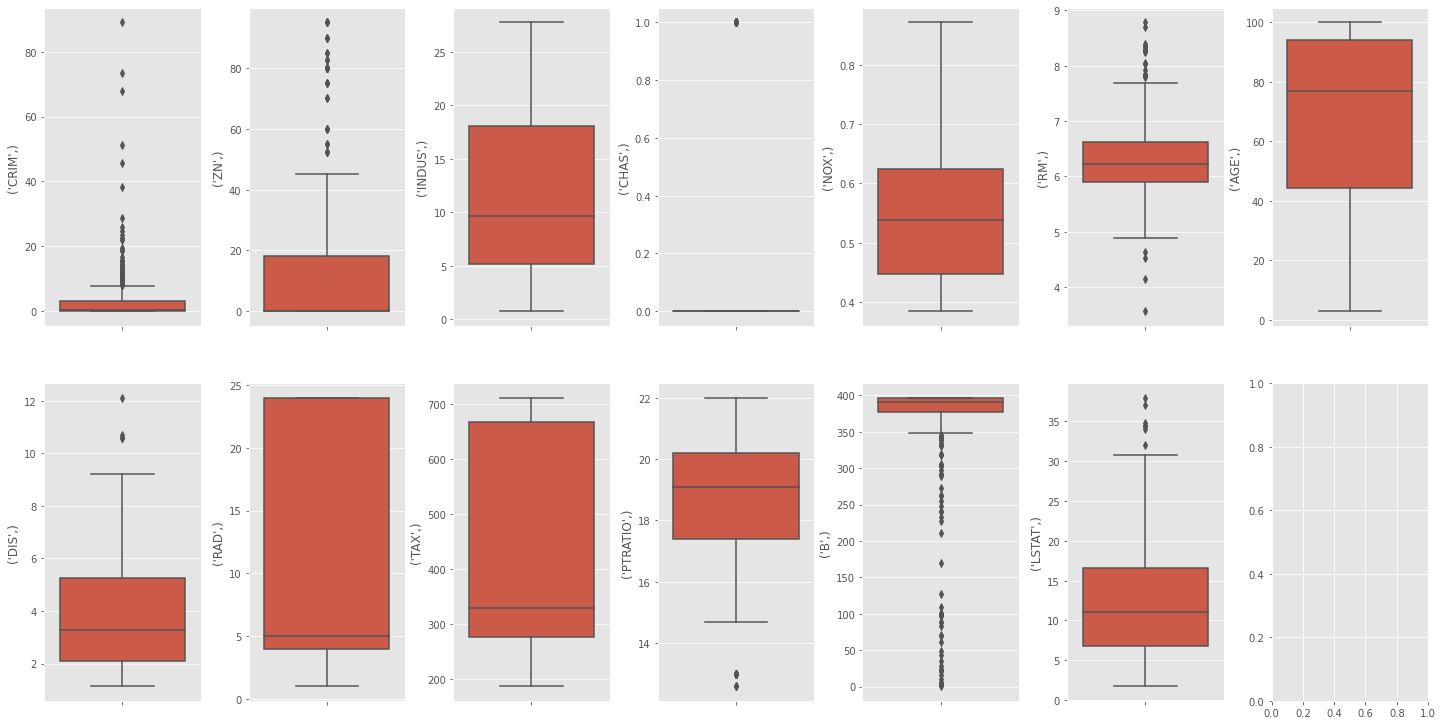

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in xtrain.items():
    sns.boxplot(y=k, data=xtrain, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

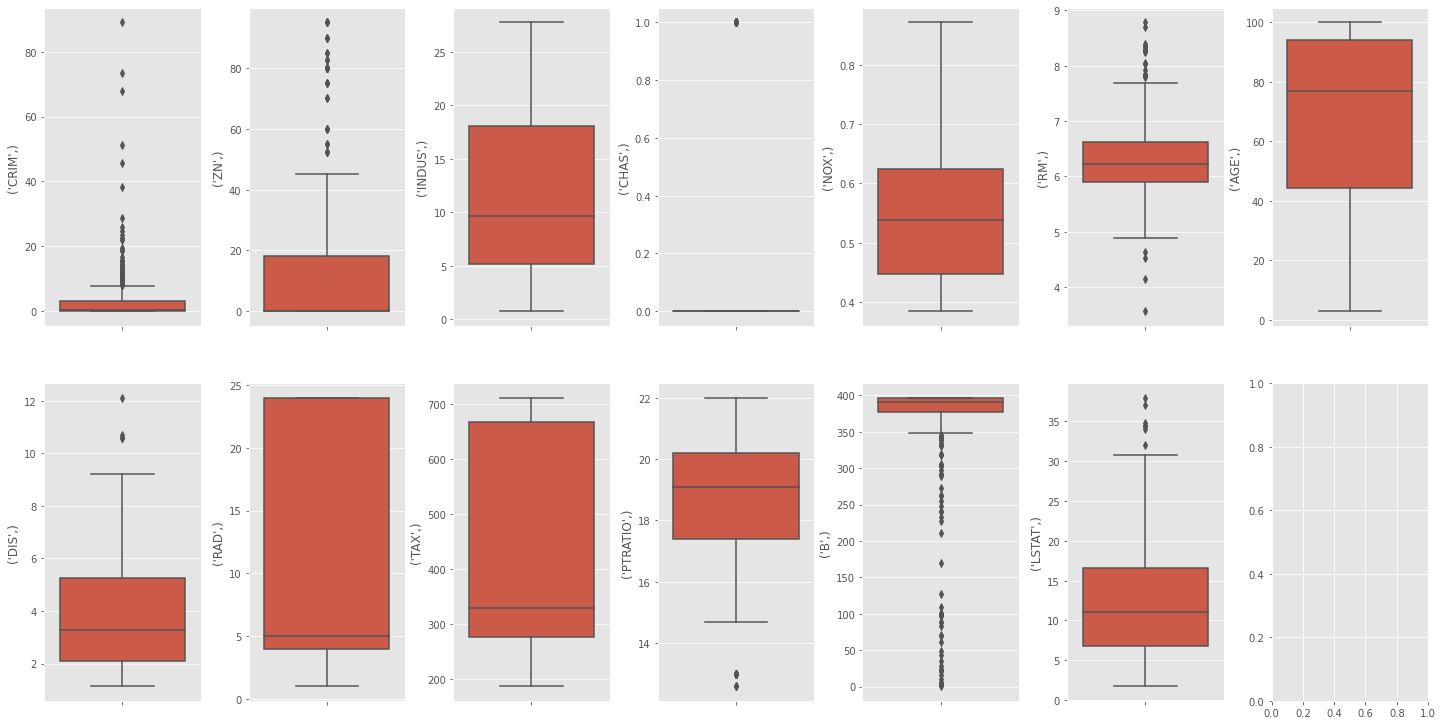

In [ ]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in xtrain.items():
    sns.boxplot(y=k, data=xtrain, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

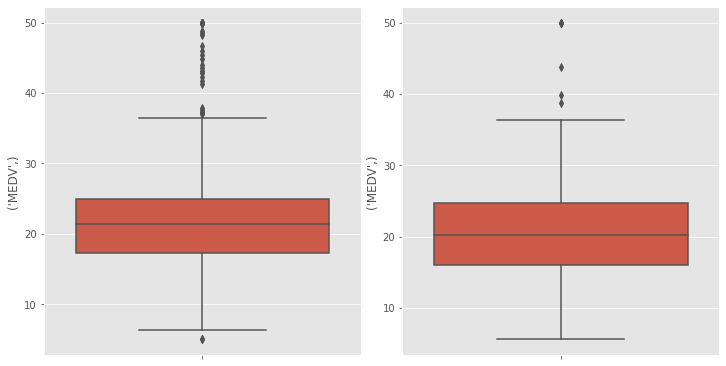

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
index = 0
axs = axs.flatten()

for k,v in ytrain.items():
    sns.boxplot(y=k, data=ytrain, ax=axs[0])
    sns.boxplot(y=k, data=ytest, ax=axs[1])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

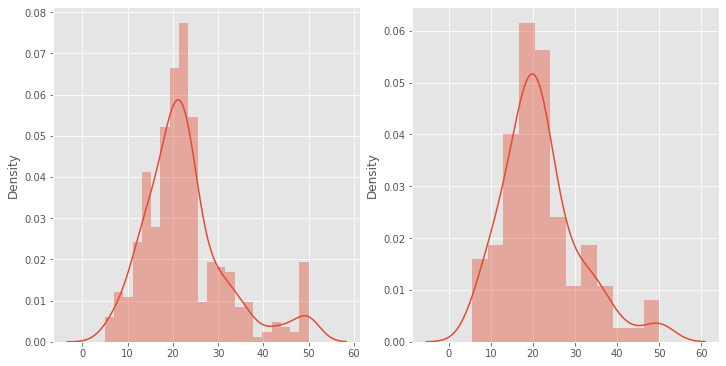

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
index = 0
axs = axs.flatten()
#for k,v in ytrain.items():
    #sns.distplot(v, ax=axs[index])
sns.distplot(ytrain['MEDV'], ax=axs[0])
sns.distplot(ytest['MEDV'], ax=axs[1])
    #sns.distplot(v, ax=axs[index])

    #index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Veo que visualmente las dos graficas de los datos split son muy parecidas, por lo que deduzco que lo ha hecho correctamente.


In [ ]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(xtrain, ytrain) 
   
y_pred = regressor.predict(xtest)

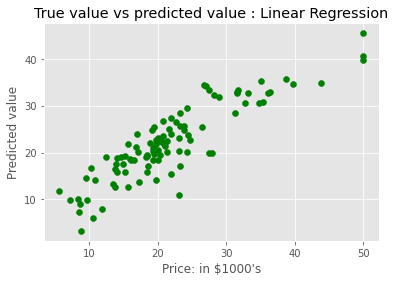

In [ ]:
plt.scatter(ytest, y_pred, c = 'green') 
plt.xlabel("Price: in $1000's") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Linear Regression") 
plt.show() 

# - Exercici 2
Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# define data
 
print('MEdia de CRIM:',xtrain['CRIM'].mean())
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(xtrain['CRIM'])
print('Media de CRIM transformado ',scaled.mean())

MEdia de CRIM: CRIM    3.446082
dtype: float64
Media de CRIM transformado  0.03863248924499451


Conclusión:
A modo de ejemplo he dibujado CRIM normalizado y como estan en df original.

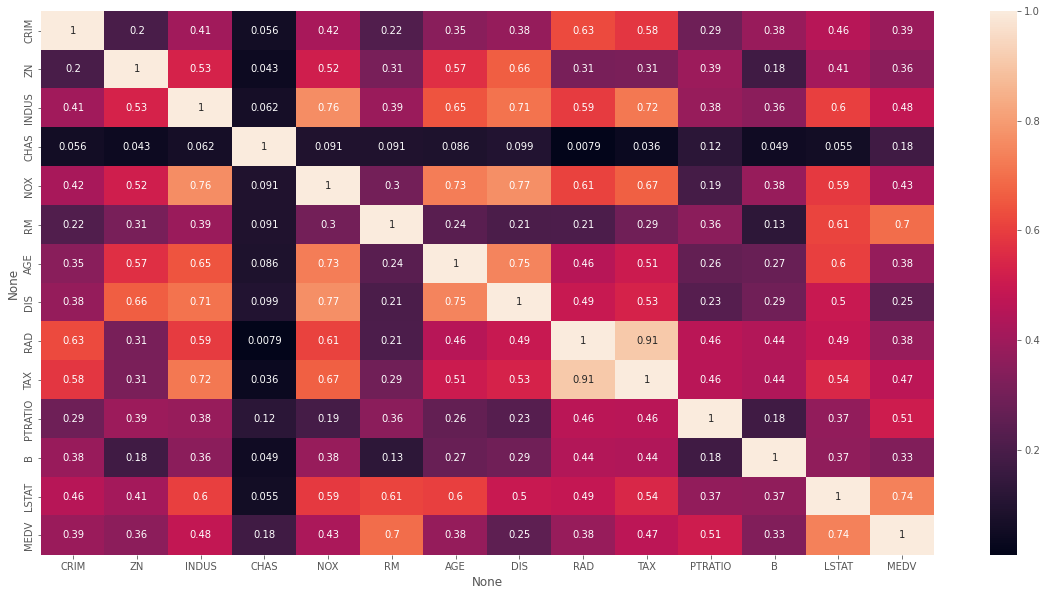

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df1.corr().abs(),  annot=True)

In [ ]:
# Nomralizo la columna CRIM

from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(xtrain['CRIM'])
normalized_CRIM = scaler.transform(xtrain['CRIM'])
#normalized_X_test = scaler.transform(xtest['CRIM'])


In [ ]:
# BINARIZACION

from sklearn.preprocessing import Binarizer


binarizer = Binarizer(threshold=0.2).fit(xtrain['CRIM'])
binary_CRIM = binarizer.transform(xtrain['CRIM'])

class sklearn.dummy.DummyRegressor(*, strategy='mean', constant=None, quantile=None)

https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html

In [ ]:
from sklearn.dummy import DummyRegressor

dummy_regr = DummyRegressor(strategy="mean")

dummy_regr.fit(X, y)

dummy_regr.predict(X)

dummy_regr.score(X, y)

0.0

In [ ]:
#Generating Polynomial Features

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5)
polynomial_CRIMS =poly.fit_transform(xtrain['CRIM'])

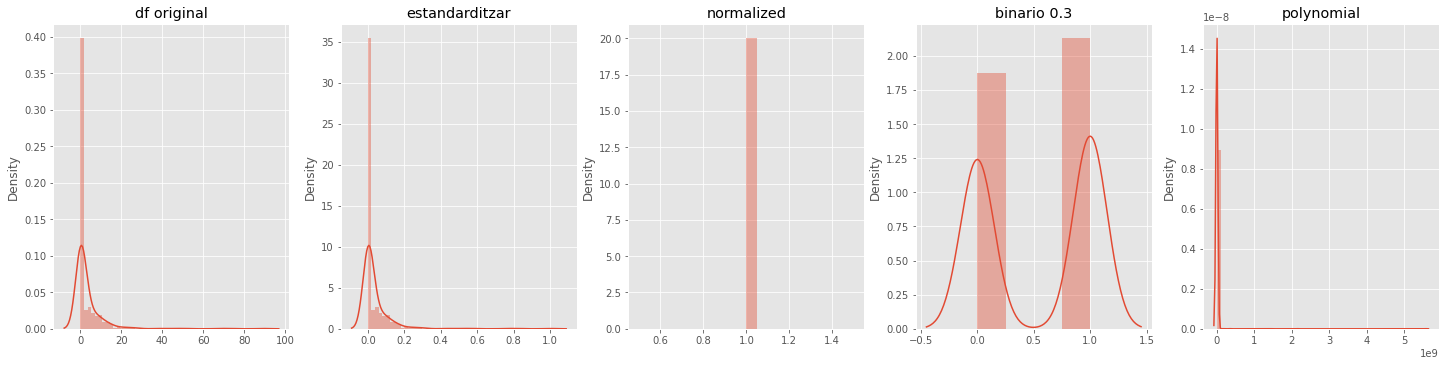

In [ ]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 5))
index = 0
axs = axs.flatten()
#for k,v in ytrain.items():
    #sns.distplot(v, ax=axs[index])
sns.distplot(xtrain['CRIM'], ax=axs[0]).set(title='df original')
sns.distplot(scaled, ax=axs[1]).set(title='estandarditzar')
sns.distplot(normalized_CRIM, ax=axs[2]).set(title='normalized')
sns.distplot(binary_CRIM, ax=axs[3]).set(title='binario 0.2')
sns.distplot(polynomial_CRIMS, ax=axs[4]).set(title='polynomial')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# Exercici 3
Resumeix les noves columnes generades de manera estadística i gràfica

In [ ]:
binary_CRIM = pd.DataFrame(binary_CRIM)

In [ ]:
# Analizo los datos
print(binary_CRIM.describe())

                0
count  404.000000
mean     0.532178
std      0.499582
min      0.000000
25%      0.000000
50%      1.000000
75%      1.000000
max      1.000000


In [ ]:
normalized_CRIM = pd.DataFrame(normalized_CRIM)
print(normalized_CRIM.describe())

           0
count  404.0
mean     1.0
std      0.0
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0


In [ ]:
polynomial_CRIMS =pd.DataFrame(polynomial_CRIMS)
print(polynomial_CRIMS.describe())

           0           1            2             3             4  \
count  404.0  404.000000   404.000000  4.040000e+02  4.040000e+02   
mean     1.0    3.446082    88.744553  4.676252e+03  3.222652e+05   
std      0.0    8.778372   561.399813  4.387185e+04  3.614744e+06   
min      1.0    0.009060     0.000082  7.436774e-07  6.737717e-09   
25%      1.0    0.079710     0.006354  5.064557e-04  4.036986e-05   
50%      1.0    0.243125     0.059114  1.437426e-02  3.495521e-03   
75%      1.0    3.202962    10.263617  3.290412e+01  1.055373e+02   
max      1.0   88.976200  7916.764166  7.044036e+05  6.267515e+07   

                  5  
count  4.040000e+02  
mean   2.446345e+07  
std    3.060138e+08  
min    6.104372e-11  
25%    3.217911e-06  
50%    8.501009e-04  
75%    3.386661e+02  
max    5.576597e+09  


In [ ]:
polynomial_CRIMS

,0,1,2,3,4,5
0,1.0,0.52014,0.270546,0.140722,7.319493e-02,3.807161e-02
1,1.0,0.09164,0.008398,0.000770,7.052455e-05,6.462870e-06
2,1.0,5.82401,33.919092,197.545134,1.150505e+03,6.700552e+03
3,1.0,0.14455,0.020895,0.003020,4.365886e-04,6.310888e-05
4,1.0,25.94060,672.914728,17455.811802,4.528142e+05,1.174627e+07
...,...,...,...,...,...,...
399,1.0,0.34109,0.116342,0.039683,1.353555e-02,4.616841e-03
400,1.0,0.02187,0.000478,0.000010,2.287679e-07,5.003155e-09
401,1.0,0.13058,0.017051,0.002227,2.907413e-04,3.796499e-05
402,1.0,0.25387,0.064450,0.016362,4.153800e-03,1.054525e-03


In [ ]:
df_CRIM = pd.concat([polynomial_CRIMS, normalized_CRIM, binary_CRIM])
df_CRIM

,0,1,2,3,4,5
0,1.0,0.52014,0.270546,0.140722,0.073195,3.807161e-02
1,1.0,0.09164,0.008398,0.000770,0.000071,6.462870e-06
2,1.0,5.82401,33.919092,197.545134,1150.504835,6.700552e+03
3,1.0,0.14455,0.020895,0.003020,0.000437,6.310888e-05
4,1.0,25.94060,672.914728,17455.811802,452814.231644,1.174627e+07
...,...,...,...,...,...,...
399,1.0,NaN,NaN,NaN,NaN,NaN
400,0.0,NaN,NaN,NaN,NaN,NaN
401,0.0,NaN,NaN,NaN,NaN,NaN
402,1.0,NaN,NaN,NaN,NaN,NaN
